In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings

In [2]:
df = pd.read_csv('datasets/mnist/fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = df.iloc[:, 1:]
images = data.values.reshape(-1, 28, 28)
print(images.shape)

(10000, 28, 28)


In [4]:
def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()

    im = [OffsetImage(i, zoom=zoom, cmap='gray') for i in images]
    x, y = np.atleast_1d(x, y)
    artists = []
    
    for x0, y0, i in zip(x, y, im):
        ab = AnnotationBbox(i, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
        
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def plot_random_subset(x, y, images, n, zoom):
    size = len(images)
    
    indices = np.random.choice(np.arange(size), n, replace=False)
    x_sample = x[indices]
    y_sample = y[indices]
    img_sample = images[indices]
    
    return imscatter(x_sample, y_sample, img_sample, zoom=zoom)

In [5]:
def perform_pca(data, number_of_components, scale=False):
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, pca

def perform_kernel_pca(data, number_of_components, scale=False):
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, kpca

def perform_mds(data, number_of_components, scale=False):
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    mds = MDS(n_components=number_of_components)
    components = mds.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, mds
    
def perform_isomap(data, number_of_components, number_of_neighbors, scale=False):
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    iso = Isomap(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = iso.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, iso

def perform_lle(data, number_of_components, number_of_neighbors, scale=False):
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    lle = LLE(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = lle.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, lle

In [6]:
pca_components, pca = perform_pca(data, None, scale=True)
pca_components.head()

C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,15.896960,-4.208240,-0.675829,2.045184,7.594440,4.490485,-6.572640,-3.331099,-3.134427,-4.729119,...,0.002797,-0.042213,-0.071476,-0.025572,0.019202,0.035366,-0.002942,0.015776,0.039520,0.006792
1,-1.146555,-17.445201,-5.474884,1.184465,-0.919584,-5.701370,6.687434,0.601124,-2.175318,4.218786,...,-0.000734,0.014983,0.006537,0.018617,0.029255,-0.010065,-0.003124,-0.019838,-0.006240,-0.015854
2,-9.792420,-3.207340,12.465532,2.017987,0.867256,-5.903238,-3.042845,-0.182123,0.212429,2.692629,...,-0.000527,0.090196,-0.025931,-0.064367,0.025634,0.012078,0.007372,0.024125,0.007456,0.020615
3,10.415549,2.468585,15.309604,7.697253,9.657261,-0.303706,-4.652869,6.612801,-9.508420,4.385325,...,0.099559,0.069770,0.144330,0.061263,-0.102896,0.147689,-0.027246,0.290729,0.168579,0.157198
4,2.907731,-10.894793,-6.090088,-6.504985,0.207735,-6.649962,-1.033369,1.357793,3.149024,-2.915593,...,-0.019700,0.021529,-0.060388,-0.020500,-0.021058,0.015800,0.012186,0.015207,-0.000080,-0.011058


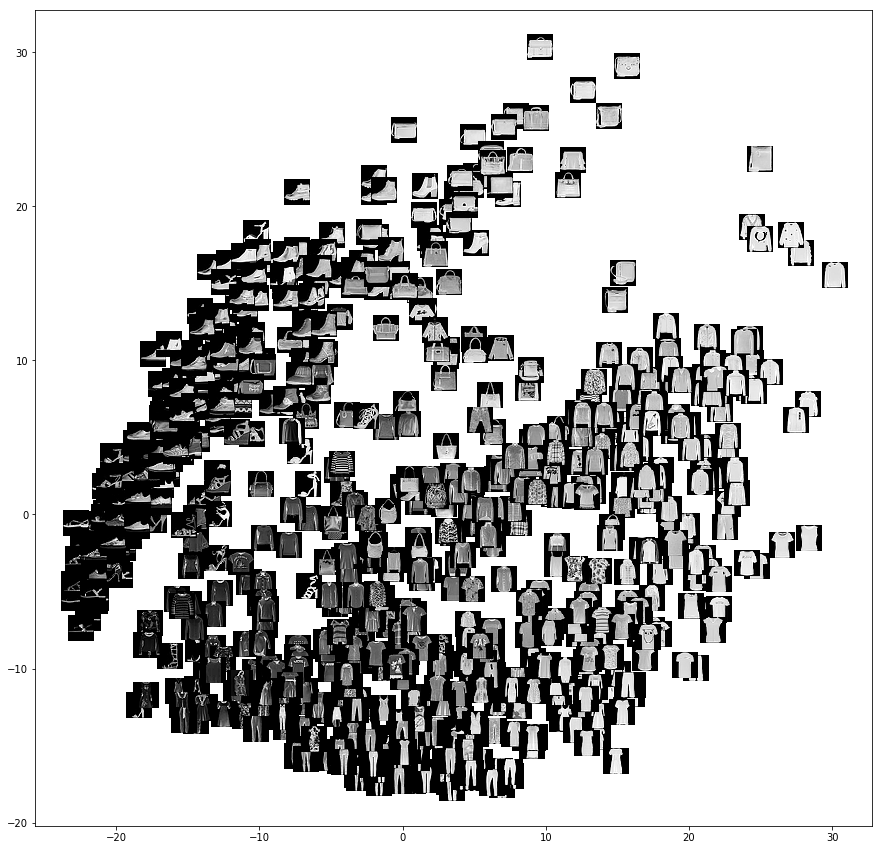

In [7]:
plt.figure(figsize=(15, 15))
fig = plot_random_subset(
    pca_components[0],
    pca_components[1],
    images,
    800,
    zoom=0.9)

In [8]:
kpca_components, kpca = perform_kernel_pca(data, 6, scale=True)
kpca_components.head()

C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5
0,0.354244,-0.017799,0.011475,-0.034267,-0.379322,0.080918
1,0.073305,0.490516,0.225489,0.076283,0.303860,0.039761
2,-0.278615,0.102473,-0.329754,0.157761,-0.015503,0.013292
3,0.092579,-0.168733,0.038990,0.184521,-0.067752,0.178043
4,0.124392,0.183782,0.128493,-0.077781,0.071073,-0.003249


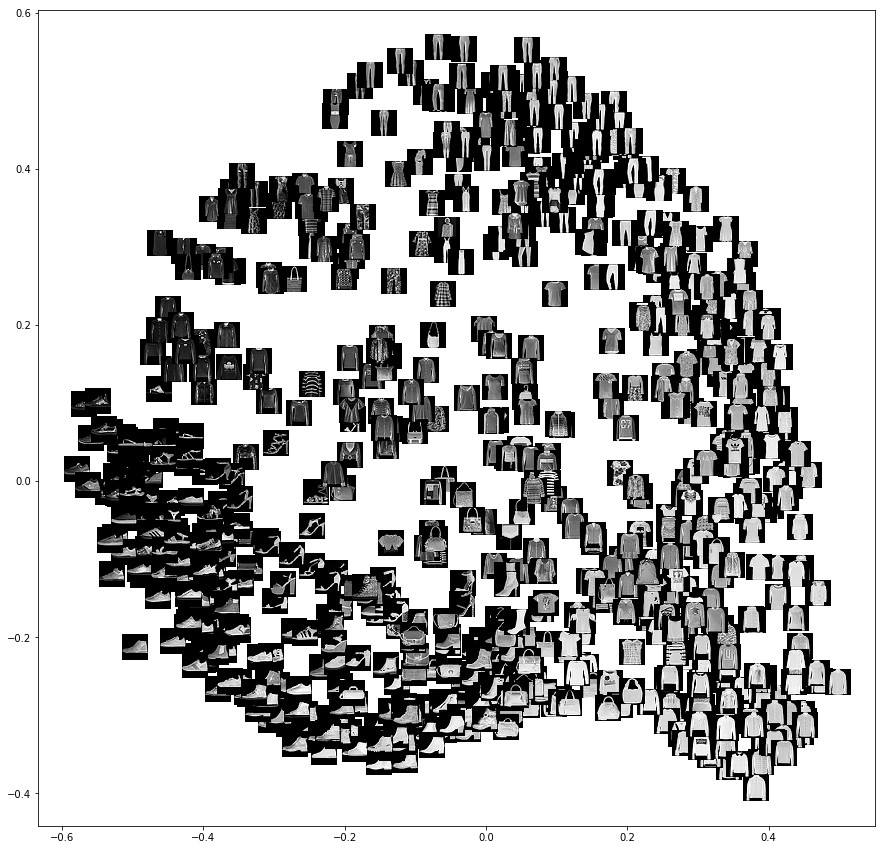

In [9]:
plt.figure(figsize=(15, 15))
fig = plot_random_subset(
    kpca_components[0],
    kpca_components[1],
    images,
    800,
    zoom=0.9)

In [ ]:
mds_components, mds = perform_mds(data, 3, scale=True)
mds_components.head()

In [10]:
iso_components, iso = perform_isomap(data, 6, 5, scale=True)
iso_components.head()

C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5
0,65.540869,-10.302213,23.447794,57.028867,-12.325034,19.782690
1,21.545054,-91.811252,0.573879,-24.640604,31.383261,-7.118942
2,5.889343,14.195512,11.018410,-3.900535,-6.450569,-32.765285
3,35.467102,60.368549,12.198130,-11.480213,-12.881832,-51.502126
4,40.360198,-57.191102,-10.913700,-16.384193,5.716095,20.044904


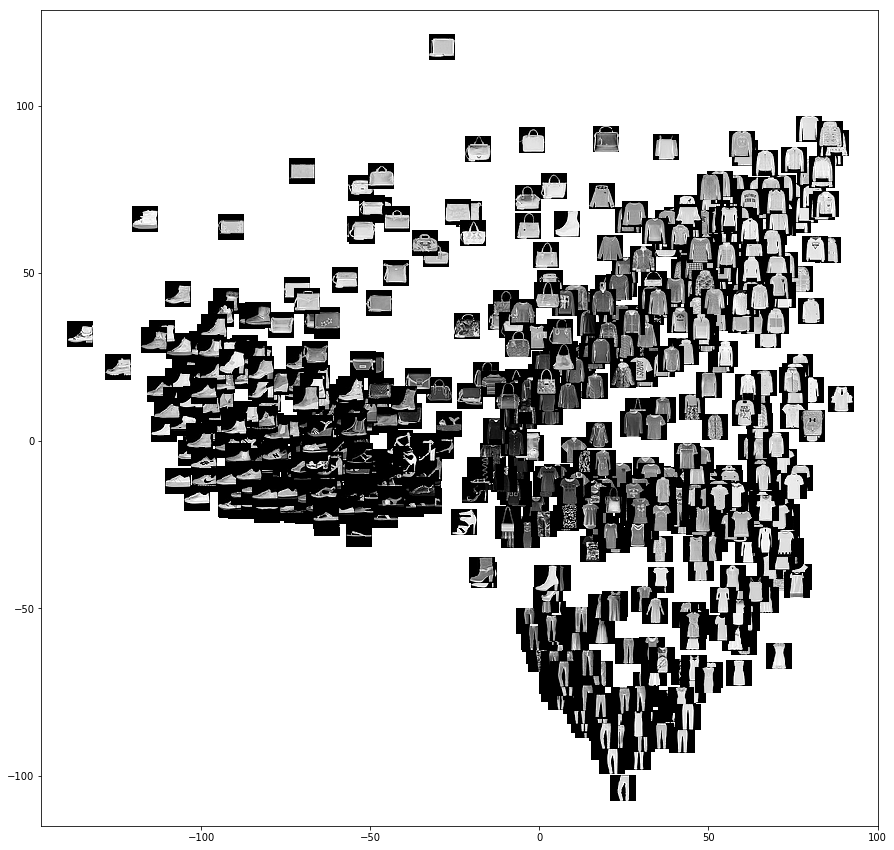

In [11]:
plt.figure(figsize=(15, 15))
fig = plot_random_subset(
    iso_components[0],
    iso_components[1],
    images,
    800,
    zoom=0.9)

In [12]:
lle_components, lle = perform_lle(data, 6, 5, scale=True)
lle_components.head()

C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mikołaj\.julia\conda\3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5
0,0.005535,-0.008105,-0.010628,0.001245,-0.009752,-0.020605
1,0.012272,0.027709,0.002606,-0.000770,-0.009718,0.000766
2,0.005512,-0.008235,-0.008564,0.000663,-0.006391,0.012005
3,0.005521,-0.008221,-0.000009,0.000427,-0.004704,0.009252
4,0.007343,0.001496,-0.004984,0.001646,0.022772,0.000181


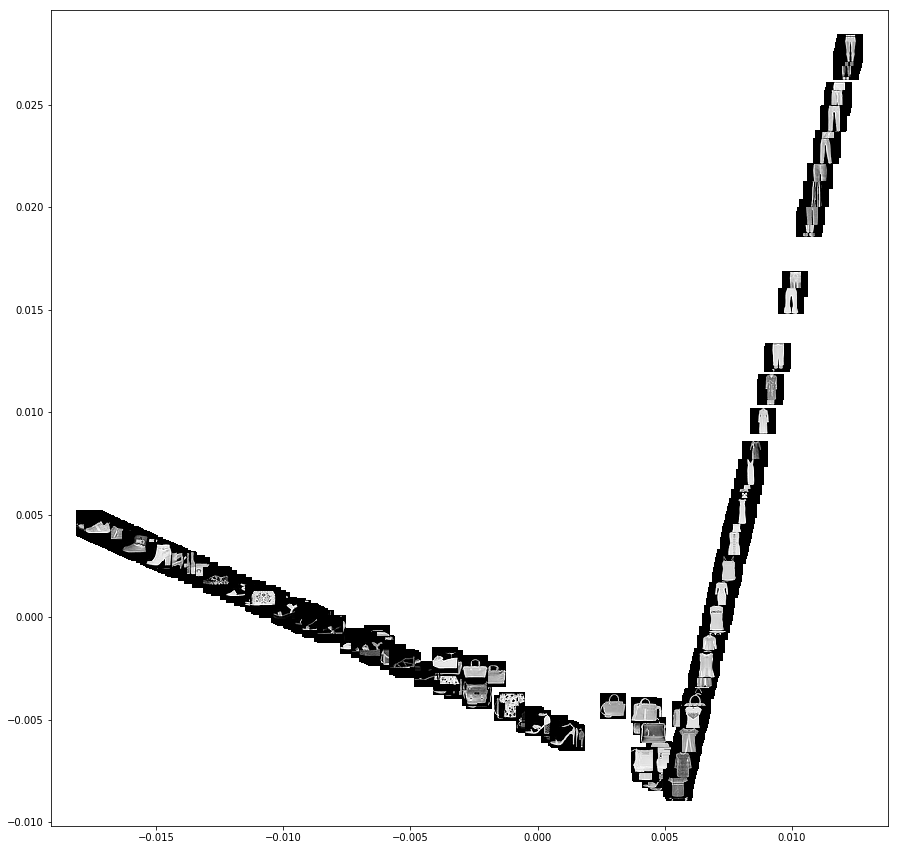

In [13]:
plt.figure(figsize=(15, 15))
fig = plot_random_subset(
    lle_components[0],
    lle_components[1],
    images,
    800,
    zoom=0.9)